<div style="display:block" direction=rtl align=right><br><br>
    <div  style="width:100%;margin:100;display:block"  display=block align=center>
        <img width=130 align=right src="https://i.ibb.co/yXKQmtZ/logo1.png" style="margin:0;" />
        <img width=170 align=left  src="https://i.ibb.co/wLjqFkw/logo2.png" style="margin:0;" />
        <span><br><font size=5>University of Tehran , school of ECE</font></span>
        <span><br><font size=3>Data Analytics Course</font></span>
        <span><br><font size=3>Fall 2022</font></span>
    </div><br><br><br>
    <div style="display:block" align=left display=block> 
        <font size=3>Homework 1</font><br>
        <hr />
        <font size=3>TA: <a href="mailto:mesbahamirhossein@gmail.com">Amirhossein Mesbah</a><br></font><br>
    </div>
</div>

# Numpy

In [15]:
import numpy as np

### Question1: mean and std of numbers between 10 and 1000.

np.arrange(10, 1001) returns a numpy array which contains number 10 to 1000. With np.mean and np.std we can get mean and std of this numbers.

In [20]:
numbers = np.arange(10,1001)
mean = np.mean(numbers)
std = np.std(numbers)
print(f'mean: {mean}')
print(f'std: {std}')

mean: 505.0
std: 286.07691273501956


### Question2: nearest point to each random point.

np.random.rand(100,10) creates a numpy array with 100 rows and 10 columns. Each row is a point.
In the second line, I changes dimension of points, so I could subtract the points from each other pairwise. Then I calculate the distance. I stored the result in distances variable and it is (100,100) numpy array.
For getting nearest point to each point, I need to get minimum distance in each row which isn't 0. I used np.where(). The first argument shows the condition. The second one is the input array, and the last one is if the element does't match with condition, it takes this value. Its output is the same with distances array except the 0 elements which changed into inf. I used argmin(axis=1) to get index of minimum distances in each row that shows nearest poit to the point in that row.

In [22]:
points = np.random.rand(100,10)
distances = ((points[np.newaxis,:,:] - points[:,np.newaxis,:]) ** 2).sum(axis=2)
np.where(distances>0, distances, np.inf).argmin(axis=1)

array([28, 95, 74, 12, 17, 52, 88, 33, 34, 64, 16, 49,  3, 52, 21, 92, 10,
       77, 21, 47, 46, 34, 75, 50, 15, 48, 96, 17, 59, 55, 31, 30, 34,  7,
       62, 10, 67, 91,  9, 95, 52, 12, 50, 44, 43, 67, 20, 48, 47, 11, 94,
       95, 40, 70, 95, 58, 66, 84, 93, 28, 43, 99, 34, 74,  9, 88, 56, 45,
       67, 72, 53, 21, 37, 52,  9, 58, 48, 17, 40, 34, 51, 48, 28, 15, 57,
       43, 56, 33, 53, 28, 40, 37, 15, 43, 50, 51, 26, 74, 46, 61],
      dtype=int64)

### Question3: Histogram of distances.

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

The first line, the same operation in question 2.
The second line, I got upper triangular of distances using np.triu and I discarded 0 elements by np.nonzero. Because I wanted to get not duplicated and non zero elements. With np.nonzero(np.triu(distances)) I got the indices and distances[np.nonzero(np.triu(distances))] got me the elements

In [24]:
distances = ((points[np.newaxis,:,:] - points[:,np.newaxis,:]) ** 2).sum(axis=2)
unique_dis = distances[np.nonzero(np.triu(distances))]

Here I created histogram of distances using matplotlib:

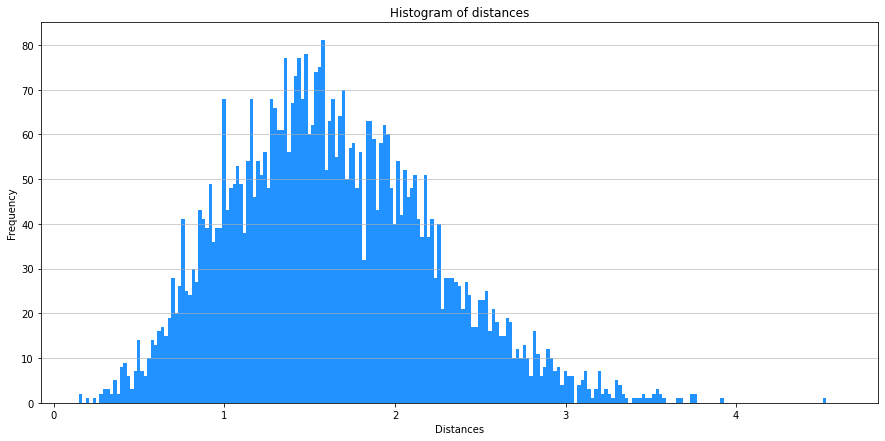

In [26]:
plt.figure(figsize=(15, 7))
plt.hist(unique_dis, bins=np.arange(unique_dis.min(), unique_dis.max()+0.1, 0.02), color='#2192FF');
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Distances')
plt.ylabel('Frequency')
plt.title('Histogram of distances');

### Question4:

Execute the cell below. By running this cell, a dataset will be loaded from `patents.csv` file. In this notebook, you are asked to analyze this data in several ways. There are three numpy arrays in this dataset:

- `patent_number`: a unique identifier for each patetnt
- `patent features`: a vector of 16 features describing several properties of each patent
- `category`: the category to which a patent belongs


In [27]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/patents.csv')
df.head()
patent_number = df['publication_number'].to_numpy()
patent_features = df['patent_embedding'].to_numpy()
temp = []
for i in range(patent_features.size):
    s = str(patent_features[i])
    s1 = s.replace(r'\n', '')
    temp.append(
        np.array(s.split()[1:-1], dtype='float')[:16]
    )

patent_features = np.stack(temp)
patent_category = df['category']

#### Part1: Which patent has the highest norm? (Eucledian distance from origin)

I calculate norm of each patent using np.linalg.norm on axis = 1. Then I got the index of maximum norm using np.argmax

In [2]:
np.argmax(np.linalg.norm(patent_features, axis = 1))

10839

#### Part 2: Find the two patents that are the farthest from eachother

using this [link](https://jaykmody.com/blog/distance-matrices-with-numpy/) I found this solution:

In [29]:
def calc_distances(x):
    y2 = np.sum(x**2, axis=1)
    xy = np.matmul(x, x.T)
    x2 = y2.reshape(-1,1)
    d = x2 - 2*xy + y2
    return np.sqrt(np.around(d, 4))

In the first line, I called the method above which may take some times and ram to run, because the patent_features is too big.

In the second line, I got maximum index of the distances numpy array using the method np.unravel_index. It returned both row and column index of maximum distance.

In [30]:
distances = calc_distances(patent_features)
i, j = np.unravel_index(distances.argmax(), distances.shape)
print(f'patents {i} and {j} are the farthest from each other')

patents 1661 and 9236 are the farthest from each other


#### Part 3: Write a function that, given a patent number, finds its nearest neighbour.

In [41]:
def nearest_neighbor(index):
    x = patent_features[index]
    dis = np.linalg.norm(patent_features - x, axis = 1)
    return patent_features[np.where(dis>0, dis, np.inf).argmin()]

In [42]:
nearest_neighbor(8)

array([ 0.00956003, -0.02285274,  0.0478351 , -0.03366008,  0.00702479,
        0.0079092 , -0.01472296,  0.01848073,  0.00506407,  0.0103008 ,
        0.01238212,  0.00103275,  0.00028315,  0.05456462, -0.02316478,
        0.02296486])

#### Part 4: How many patents have a nearest neighbour that is in the same category?

In [100]:
nearest = np.where(distances>0, distances, np.inf).argmin(axis=1)

In [101]:
np.sum(patent_category[nearest].reset_index(drop=True) == patent_category.reset_index(drop=True))

12933

#### Part 5: What is the average and std of distances between every pair of patents within a category? Using these calculated quantities, which cluster do you think is more condensed? Which one is more scattered?

For this function, I use this [solution](https://stackoverflow.com/questions/30003068/how-to-get-a-list-of-all-indices-of-repeated-elements-in-a-numpy-array)

In [52]:
def split_array(records_array):
    vals, inverse, count = np.unique(records_array, return_inverse=True,
                                  return_counts=True)

    idx_vals_repeated = np.where(count > 1)[0]
    vals_repeated = vals[idx_vals_repeated]

    rows, cols = np.where(inverse == idx_vals_repeated[:, np.newaxis])
    _, inverse_rows = np.unique(rows, return_index=True)
    return np.split(cols, inverse_rows[1:])

In [65]:
cats = np.array(patent_category)
indices = split_array(cats)
splitted = [[x for x in patent_features[i]] for i in indices]
dis_foreach_cat = [calc_distances(np.array(x)) for x in splitted]

In [98]:
[np.mean(x) for x in dis_foreach_cat]

[0.13098788820893562,
 0.10235576559800347,
 0.14095504006718684,
 0.13874016368265063,
 0.13610870838522351,
 0.13459825864914501,
 0.10400535013580435,
 0.13052360709718733]

In [99]:
[np.std(x) for x in dis_foreach_cat]

[0.039730456889040984,
 0.030561155675097953,
 0.04403438437430892,
 0.04483114253700086,
 0.04026924022603192,
 0.04241680280903665,
 0.03180264668252836,
 0.03853360250984639]

The standard deviation of all categories is almost the same. The mean of category 1 and 6 is less than the others which means the patents of these categories are closer to each other. The mean of category 2 is the most. So the patents in this category are more scattered.

# Working with different Data Files

## .txt

In [31]:
f = open('data/zen_of_python.txt','r')
text = f.read()

### Part 1: store words in a list

I got all words using text.split(). To get unique words, I used dict.fromkeys and finally I used list() to store them into a list

In [34]:
words = list(dict.fromkeys(text.split()))

### Part 2: Occurrence of each character

The method Counter of collections library, count each character in a string data.

In [36]:
import collections
count = collections.Counter(text)
print(count)

Counter({' ': 134, 'e': 95, 't': 77, 'a': 52, 'i': 51, 'o': 47, 's': 46, 'n': 41, 'r': 38, 'l': 34, 'h': 32, 'b': 23, '\n': 23, 'u': 23, 'p': 20, 'm': 19, '.': 18, 'c': 18, 'y': 17, 'd': 17, 'f': 14, 'g': 11, 'x': 6, '-': 6, 'v': 5, 'w': 5, 'N': 5, ',': 4, "'": 4, 'T': 3, 'S': 3, 'A': 3, 'I': 3, ':': 3, 'P': 2, 'E': 2, 'k': 2, '*': 2, '1': 2, '4': 2, 'Z': 1, 'B': 1, 'C': 1, 'F': 1, 'R': 1, 'U': 1, 'D': 1, '!': 1, '8': 1, '5': 1, '6': 1, '2': 1})


### Part 3: Occurrence of each word

First, I stored all the words of text in a variable.

In the for loop of unique word, I calculate occurrence of each word using count method on the variable I defined first.

In [37]:
list_of_words = text.split()
occurrence_of_words = {}
for word in words :
    occurrence_of_words[word] = list_of_words.count(word)
occurrence_of_words

{'The': 1,
 'Zen': 1,
 'of': 6,
 'Python,': 1,
 'by': 1,
 'Tim': 1,
 'Peters': 1,
 'Beautiful': 1,
 'is': 10,
 'better': 8,
 'than': 8,
 'ugly.': 1,
 'Explicit': 1,
 'implicit.': 1,
 'Simple': 1,
 'complex.': 1,
 'Complex': 1,
 'complicated.': 1,
 'Flat': 1,
 'nested.': 1,
 'Sparse': 1,
 'dense.': 1,
 'Readability': 1,
 'counts.': 1,
 'Special': 1,
 'cases': 1,
 "aren't": 1,
 'special': 1,
 'enough': 1,
 'to': 5,
 'break': 1,
 'the': 5,
 'rules.': 1,
 'Although': 3,
 'practicality': 1,
 'beats': 1,
 'purity.': 1,
 'Errors': 1,
 'should': 2,
 'never': 2,
 'pass': 1,
 'silently.': 1,
 'Unless': 1,
 'explicitly': 1,
 'silenced.': 1,
 'In': 1,
 'face': 1,
 'ambiguity,': 1,
 'refuse': 1,
 'temptation': 1,
 'guess.': 1,
 'There': 1,
 'be': 3,
 'one--': 1,
 'and': 1,
 'preferably': 1,
 'only': 1,
 'one': 2,
 '--obvious': 1,
 'way': 2,
 'do': 2,
 'it.': 1,
 'that': 1,
 'may': 2,
 'not': 1,
 'obvious': 1,
 'at': 1,
 'first': 1,
 'unless': 1,
 "you're": 1,
 'Dutch.': 1,
 'Now': 1,
 'never.': 1,


In [38]:
f.close()

### Part 4: Define a function for saving stats at the end of `.txt` file

تابعی بنویسی که به ازای هر فایل ورودی با فرمت  .txtتعداد لغات، کاراکتر و سطر فایل متنی را
چاپ کرده و در انتهای آن فایل ورودی نوشته و ذخیره کند

In thhis method, I check the format of input file using name.endswith, then I got the required things using len and count.

Then write this information in the file using write method.

In [39]:
def process_of_txt_file(file):
    if not file.name.endswith('.txt'):
        raise TypeError(u'The format of file should be txt')
    text = file.read()
    len_of_characters = len(text)
    len_of_words = len(text.split())
    len_of_lines = text.count('\n') + 1
    print('Number of characters: ' ,len_of_characters)
    print('Number of  words: ' ,len_of_words)
    print('Number of lines: ' ,len_of_lines)
    file.write('\nNumber of characters: ' + str(len_of_characters))
    file.write('\nNumber of  words: ' + str(len_of_words))
    file.write('\nNumber of lines: ' + str(len_of_lines))
    file.close()

### Part 5: Apply your defined function on 'zen_of_python.txt`

In [23]:
f = open('data/zen_of_python.txt','r+')
process_of_txt_file(f)

Number of characters:  856
Number of  words:  144
Number of lines:  21


## csv

### Part 1: number of features and data points

In [50]:
import pandas as pd
import numpy as np
patents = pd.read_csv('data/patents.csv') 

In [51]:
datapoints, features = patents.shape
print(f'number of features: {features}')
print(f'number of data points: {datapoints}')

number of features: 5
number of data points: 15689


### Part 2: Name of Features

patents.columns has the name of features. so with a for loop on it, we can show the name of each feature

In [52]:
for x in patents.columns:
    print(x)

publication_number
title
cpc_code
patent_embedding
category


### Part 3: Print Stats of Dataframe

In [53]:
categories = patents.loc[:,'category']
print(categories.mean())
print(np.median(categories))
print(np.quantile(categories, 0.25))
print(np.quantile(categories, 0.75))
print(np.std(categories))
print(categories.max())
print(categories.min())

3.85422907769775
4.0
1.0
6.0
2.4992270065169824
7
0


### Part 4: print rows.

In [54]:
# 5 first rows
patents.head(5)

,publication_number,title,cpc_code,patent_embedding,category
0,US-2019250858-A1,memory controller and operating method thereof,G06F3/061,[ 0.00135472 0.01564001 -0.04858465 0.039866...,1
1,US-1000462-A,corn planter,A01C9/00,[-4.44490612e-02 2.48770583e-02 -5.62837869e-...,6
2,KR-200146416-Y1,antitheft vehicle security system,B60R25/209,[-2.53110677e-02 -2.04547048e-02 8.63679312e-...,0
3,KR-0160422-B1,a door opening and shutting apparatus and meth...,D06F37/42,[ 1.21761542e-02 1.97522007e-02 -6.62921891e-...,1
4,US-952306-A,spray burner,B05B1/3033,[-0.00214472 0.01606156 -0.09518531 0.060160...,0


In [55]:
# 5 last rows
patents.tail(5)

,publication_number,title,cpc_code,patent_embedding,category
15684,AT-415717-T,method and device for produce a low pressure w...,H01M8/04104,[ 1.77878514e-02 3.53233777e-02 -3.37363742e-...,1
15685,AT-424202-T,substitute _NUMBER_ thio _NUMBER_ _NUMBER_ dic...,C07D417/12,[-0.03664465 -0.01075565 -0.02483719 -0.033502...,5
15686,CA-2952951-A1,end tip for a vehicle wiper blade,B60S1/3894,[-4.39246558e-02 2.96350904e-02 -2.31920835e-...,0
15687,CH-608317-A,process for the compressive shrinkage of a web...,D06C21/00,[-3.34328553e-03 1.02757774e-02 -2.01825500e-...,6
15688,CN-100513251-C,system and process for open cover vessel hull,B63B71/00,[-1.98921170e-02 3.07969116e-02 -2.46879123e-...,6


In [56]:
# 5 random row
patents.sample(5)

,publication_number,title,cpc_code,patent_embedding,category
6734,US-2017165942-A1,steel reinforce element coat with an adhesive ...,B32B7/12,[-0.01313424 0.02561567 -0.02121337 0.046601...,6
233,US-6855373-B2,method and device relate to coat a running web,B05C11/06,[ 6.41068583e-03 3.98901589e-02 -3.29432860e-...,1
10399,AT-275272-T,speed analysis for seismic data,G01V1/303,[-2.38145273e-02 3.06275971e-02 -1.85000729e-...,7
13323,US-10446057-B2,weld speed sensor,G09B19/24,[-1.90189220e-02 5.96075729e-02 1.43240308e-...,7
2307,US-9212296-B2,organic compound optical film and method of pr...,C09D177/06,[ 1.37514072e-02 -1.10867387e-02 -3.63043807e-...,1


### DataType of each column

the mothod __dtypes__ returns the data type of each column

In [57]:
patents.dtypes

publication_number    object
title                 object
cpc_code              object
patent_embedding      object
category               int64
dtype: object

### Part 5: use iloc and loc to select rows

In [58]:
# loc
patents.loc[1024:2048,'title']

1024    device for purple coupling of rotatable axle o...
1025                                     heat pump system
1026    condensation dryer comprise a heat pump and me...
1027                     animal _NUMBER_ plead ingredient
1028                      electrostatic dust precipitator
                              ...                        
2044                  crystalline anti htnfalpha antibody
2045    method information processing apparatus and co...
2046        pork rind bait and method of prepare the same
2047    process for the treatment of titanium contain ...
2048    air condition system of a motor vehicle and me...
Name: title, Length: 1025, dtype: object

In [59]:
# iloc
patents.iloc[1024:2049,1]

1024    device for purple coupling of rotatable axle o...
1025                                     heat pump system
1026    condensation dryer comprise a heat pump and me...
1027                     animal _NUMBER_ plead ingredient
1028                      electrostatic dust precipitator
                              ...                        
2044                  crystalline anti htnfalpha antibody
2045    method information processing apparatus and co...
2046        pork rind bait and method of prepare the same
2047    process for the treatment of titanium contain ...
2048    air condition system of a motor vehicle and me...
Name: title, Length: 1025, dtype: object

#### difference between loc and iloc
With loc, the range 1024:2048 prints all rows 1024 to 2048, and for column we can write name of column that here is 'title'.
But iloc is a little different! The range 1024:2048 prints all rows 1024 to 2047 and doesn't print element in row 2048. so we should write 1024:2049 to print all rows 1024 to 2048. Another diffence is that for selecting columns, we should write the index of column not the name of it. Here the index of column 'title' is 1.

### Part 5: Check Dataframe for NaN values

In [62]:
patents.isnull().values.any()

False

### Part 6: Check Dataframe for duplicates

In [63]:
patents.duplicated().sum() > 0

True

### Part 7: Use `Lambda` Function for calculating word counts

Here I used __apply__ method which check every elment at title column. In lambda function first split the element to get the list of words. Then it returns length of this list which is the number of words using method len.

In [64]:
patents['title_length'] = patents['title'].apply(lambda x: len(x.split()))
patents

,publication_number,title,cpc_code,patent_embedding,category,title_length
0,US-2019250858-A1,memory controller and operating method thereof,G06F3/061,[ 0.00135472 0.01564001 -0.04858465 0.039866...,1,6
1,US-1000462-A,corn planter,A01C9/00,[-4.44490612e-02 2.48770583e-02 -5.62837869e-...,6,2
2,KR-200146416-Y1,antitheft vehicle security system,B60R25/209,[-2.53110677e-02 -2.04547048e-02 8.63679312e-...,0,4
3,KR-0160422-B1,a door opening and shutting apparatus and meth...,D06F37/42,[ 1.21761542e-02 1.97522007e-02 -6.62921891e-...,1,12
4,US-952306-A,spray burner,B05B1/3033,[-0.00214472 0.01606156 -0.09518531 0.060160...,0,2
...,...,...,...,...,...,...
15684,AT-415717-T,method and device for produce a low pressure w...,H01M8/04104,[ 1.77878514e-02 3.53233777e-02 -3.37363742e-...,1,17
15685,AT-424202-T,substitute _NUMBER_ thio _NUMBER_ _NUMBER_ dic...,C07D417/12,[-0.03664465 -0.01075565 -0.02483719 -0.033502...,5,13
15686,CA-2952951-A1,end tip for a vehicle wiper blade,B60S1/3894,[-4.39246558e-02 2.96350904e-02 -2.31920835e-...,0,7
15687,CH-608317-A,process for the compressive shrinkage of a web...,D06C21/00,[-3.34328553e-03 1.02757774e-02 -2.01825500e-...,6,12


### Part 8: Plot Histogram of Word counts

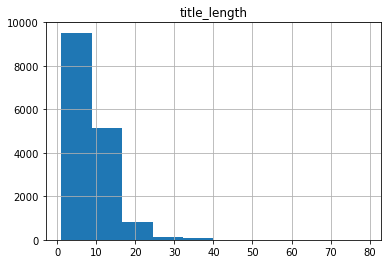

In [65]:
patents.hist(column='title_length');

## Log

### Part 1: Number of Total Commits

In [16]:
f = open("data/git_log.log" ,'r', encoding="utf8")
text = f.read()
text.count('commit')

542

### Part 2: Extract Developer name, Email, Commit Count and last commit date and create a Dataframe

For this section, I used the codes from this [link](https://github.com/feststelltaste/software-analytics/blob/master/notebooks/Read%20in%20semi-structured%20data%20with%20pandas.ipynb)

In [99]:
import pandas as pd

log = pd.read_csv(
    "data/git_log.log",
    sep="\u0012",
    names=['raw'])
log.head(5)

,raw
0,commit 4d3d9de655faa813781027d8b1baed819c6a56fe
1,Author: Markus Harrer <feststelltaste@googlema...
2,Date: Tue Mar 5 22:32:20 2019 +0100
3,add virtual bounded contexts
4,20\t1\tjqassistant/business.adoc


Here I extreacted sha, author, timestamp, email and developer name from the raw column of dataframe which I have created from the log file:

In [100]:
log['sha'] = log.loc[log['raw'].str.startswith("commit ")]['raw'].str.split("commit ").str[1]
log['author'] = log.loc[log['raw'].str.startswith("Author: ")]['raw'].str.split("Author: ").str[1]
log['timestamp'] = log.loc[log['raw'].str.startswith("Date: ")]['raw'].str.split("Date: ").str[1]
temp = log.loc[log['author'].notnull()]['author'].str.split('<|>')
log['email'] = temp.str[1]
log['developer'] = temp.str[0]

using fillna, I filled the NaN elements of sha column based on the corresponding value in the previous row.

In [101]:
log['sha'] = log['sha'].fillna(method="ffill")

The first line, grouping the elements by sha column and get first valid of each column developer, email and timestamp.

The second line, calculate each developer's commit.

The third line, calculate the last commit date.

Two next lines defines commit_count and last_commit_date columns for the variable last which has information of each developer.

Then delete timestamp column because we don't need it anymore.

Finally reset the index of last variable and store the result of dataframe in info_df varible.

In [104]:
grop1 = log.groupby('sha')[['developer', 'email', 'timestamp']].first()
counting = grop1.groupby('email')[['developer']].count()
last = grop1.groupby('email')[['developer', 'timestamp']].last()
last['commit_count'] = counting['developer']
last['last_commit_date'] = last['timestamp']
del(last['timestamp'])
info_df = last.reset_index()

print info_df dataframe to show each developer informatio:

In [105]:
info_df

,email,developer,commit_count,last_commit_date
0,Andrej1,AndrejGajdos,1,Thu Jul 28 13:50:07 2016 +0200
1,JavaOnAutobahn@users.noreply.github.com,JavaOnAutobahn,5,Fri Feb 9 13:55:25 2018 +0100
2,ameya@ccs.neu.edu,Ameya Pandilwar,1,Sun Feb 7 18:31:11 2016 -0500
3,ameya@pandilwar.com,Ameya Pandilwar,1,Sun Jun 19 02:23:53 2016 -0400
4,antoine.rey@free.fr,Antoine Rey,41,Tue Jun 9 08:40:49 2015 +0200
5,antoine.rey@gmail.com,Antoine Rey,23,Wed Aug 10 18:08:06 2016 +0200
6,armagan.ersoz@gmail.com,kadinyazilimci,1,Thu Feb 25 09:36:20 2016 +1000
7,attilio@attil.io,Attilio,1,Wed Jun 15 22:46:47 2016 +0200
8,boly38@gmail.com,boly38,1,Fri Jul 12 10:22:38 2013 +0200
9,bram@mire.be,Bram Luyten,1,Sun May 11 18:37:42 2014 +0200


### Part 3: Developers with Maximum and Minimum Commit count

In [135]:
max_commit = info_df.loc[info_df['commit_count'] == info_df['commit_count'].max(), 'developer']
min_commit = info_df.loc[info_df['commit_count'] == info_df['commit_count'].min(), 'developer']
print(f'Developer with maximum commit count:\n {max_commit}')
print(f'Developer with minimum commit count:\n {min_commit}')

Developer with maximum commit count:
 31    Mic 
Name: developer, dtype: object
Developer with minimum commit count:
 0        AndrejGajdos 
2     Ameya Pandilwar 
3     Ameya Pandilwar 
6      kadinyazilimci 
7             Attilio 
8              boly38 
9         Bram Luyten 
10        Chris Beams 
12          Colin But 
13       Craig Dennis 
18      Faisal Hameed 
19         IHABRITANE 
26        XIAO XI LIU 
27       lukasz-szewc 
28             mklose 
29      Mike Eltsufin 
33     patrickcrocker 
35     Vlad Selpukhin 
36           srenkens 
37             TejasM 
39            thinksh 
41     Thomas Risberg 
42             Dapeng 
Name: developer, dtype: object


## Json

### Part 1: Create Dataframe from Json files

Get all file's name in folder data/Videos using os.walk and then store them in a list

In [109]:
import os
list_of_files = list(os.walk('data/Videos'))[0][2]

Here we have a for loop to open and read each file in the list we created in the previous part.

Using json.loads, we can parse a sjson file and convert it into a dictionary. So we can extract data from it easily.

In [112]:
import json
from datetime import datetime
movies = {'Title':[], 'Lang':[], 'Record_date':[], 'url':[], 'Description':[],
         'Category':[], 'Tags':[], 'Speakers':[], 'Duration':[]}
for file in list_of_files:
    f = open(f'data/Videos/{file}', 'r')
    data = f.read()
    info = json.loads(data)
    movies['Title'].append(info.get('title'))
    movies['Lang'].append(info.get('language'))
    movies['Record_date'].append(datetime.strptime(info.get('recorded'), '%Y-%m-%d'))
    movies['url'].append(info.get('videos'))
    movies['Description'].append(info.get('description'))
    movies['Category'].append(info.get('category'))
    movies['Tags'].append(info.get('tags'))
    movies['Speakers'].append(info.get('speakers'))
    movies['Duration'].append(info.get('duration'))
df_movies = pd.DataFrame(movies)

In [113]:
df_movies

,Title,Lang,Record_date,url,Description,Category,Tags,Speakers,Duration
0,3D Print Anything with the Blender API,eng,2015-04-11,"[{'length': 0, 'type': 'youtube', 'url': 'http...",,PyCon US 2015,[],[Jenny Cheng],NaN
1,A Beginner's Guide to Test-driven Development,eng,2015-04-11,"[{'length': 0, 'type': 'youtube', 'url': 'http...",Software is maintained by humans with limited ...,PyCon US 2015,[],[Itamar Turner-Trauring],NaN
2,A lightning look at O'Reilly's Python books,eng,2014-12-11,"[{'type': 'archive.org', 'url': 'https://archi...",Wouldn't it be awesome if ChiPy wrote its own ...,ChiPy,[lightning talks],[Tanya Schlusser],900.0
3,A Talk on Giving a Pythonic Talk,eng,2015-03-12,"[{'type': 'archive.org', 'url': 'https://archi...",Xan Vongsathorn and Catherine Vongsathorn will...,ChiPy,[],"[Catherine Vongsathorn, Xan Vongsathorn]",1500.0
4,A Visual Guide To Pandas,eng,2013-12-12,"[{'type': 'archive.org', 'url': 'https://archi...",,ChiPy,[],[Jason Wirth],30.0
...,...,...,...,...,...,...,...,...,...
239,"Who saved The Onion, from being hacked by ""Syr...",eng,2013-05-09,"[{'type': 'mp4', 'url': 'http://s3.us.archive....",,ChiPy,[],[Sean Bloomfield],5.0
240,Winning Machine Learning Competitions With Sci...,eng,2015-04-10,"[{'length': 0, 'type': 'youtube', 'url': 'http...",This tutorial will offer an introduction machi...,PyCon US 2015,[],[Ben Hamner],NaN
241,"""Words, words, words"": Reading Shakespeare wit...",eng,2015-04-11,"[{'length': 0, 'type': 'youtube', 'url': 'http...",This talk will give an introduction to text an...,PyCon US 2015,[],[Adam Palay],NaN
242,Your Brain's API: Giving and Getting Technical...,eng,2015-04-12,"[{'length': 0, 'type': 'youtube', 'url': 'http...",Software engineers are never done learning sin...,PyCon US 2015,[],[Sasha Laundy],NaN


### Part 2: Handle Missing Values

First counting the number of NaN in each column

In [115]:
df_movies.isna().sum(axis=0)

Title            0
Lang             0
Record_date      0
url              0
Description      0
Category        35
Tags             5
Speakers         0
Duration       176
dtype: int64

In [116]:
df_movies[['Category']] = df_movies[['Category']].fillna(value='Uncategorized')
df_movies[['Tags']] = df_movies[['Tags']].fillna(value='[]')
df_movies[['Duration']] = df_movies[['Duration']].fillna(value=df_movies[['Duration']].min())

### Part 3: Title of videos published in 2016

In [117]:
df_movies.loc[pd.DatetimeIndex(df_movies['Record_date']).year == 2016, 'Title']

25                               ChiPy Python Mentorship
169    Python-based data science to understand knowle...
212         The wonder and the horror of the mock module
Name: Title, dtype: object

### Part 4: Mean, Min, Max, Median of Duration for each Category

In [118]:
df_movies.groupby('Category')['Duration'].mean()

Category
ChiPy             185.480000
PyCon US 2015       4.000000
Uncategorized    2481.771429
Name: Duration, dtype: float64

In [119]:
df_movies.groupby('Category')['Duration'].min()

Category
ChiPy              4.0
PyCon US 2015      4.0
Uncategorized    300.0
Name: Duration, dtype: float64

In [120]:
df_movies.groupby('Category')['Duration'].max()

Category
ChiPy            3600.0
PyCon US 2015       4.0
Uncategorized    4328.0
Name: Duration, dtype: float64

In [121]:
df_movies.groupby('Category')['Duration'].median()

Category
ChiPy               4.0
PyCon US 2015       4.0
Uncategorized    2535.0
Name: Duration, dtype: float64

### Part 5: Create `label` Column

first I create function func which return the value of label of a input.

Then, I applied this function in the column Duration and store in a new column called label.

In [122]:
def func(x):
    if x < 1000 :
        return 1
    elif x > 1000 and x < 2000:
        return 2
    else:
        return 3
df_movies['label'] = df_movies['Duration'].apply(func)

### Part 6: First and Last video of each label

In [123]:
df_movies.groupby('label')['Title'].first()

label
1    3D Print Anything with the Blender API
2         A Talk on Giving a Pythonic Talk 
3            When Python Practices Go Wrong
Name: Title, dtype: object

In [124]:
df_movies.groupby('label')['Title'].last()

label
1       Zen of Quality
2       REST on Django
3    Python For Humans
Name: Title, dtype: object

### (Bonus) part 7: WordCloud of Discription